In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [ ]:
model=pickle.load(open("finalized_model.sav", "rb"))

In [ ]:
import json
with open('twitter.json') as json_file: 
    df1 = json.load(json_file) 
df1

{'1': '@avi_my_name @elonmusk @RobertDowneyJr I hope @Interstellar too comes true.',
 '10': 'RT @NASA: LIVE NOW: History is about to be made. Watch as @NASA_Astronauts #LaunchAmerica to the @Space_Station from American soil for the…',
 '11': "@sudipguti Seriously! What are they doing? And why aren't they informing us beforehand? Do they not realise that pe… https://t.co/R677x22YRx",
 '12': '@poojam1507 @Girlscript1 I am selected as a participant in Python programming. Hoping to learn new things and work along. Congrats. ✌️✌️',
 '13': 'It has been 10 hours now without any kind of information from the distributors. This needs to resolve soon.… https://t.co/ZzmvCc7C91',
 '14': "@AllianceBroadb1 Please notify your users before performing any sort of maintenance work! I'm from Hooghly district… https://t.co/guLsIP7hCS",
 '15': 'Been in #lockdownindia for 2 months now and many incidents happened. From #COVID to #Amphan and then… https://t.co/dQuEd0eNK2',
 '16': 'Now WTF is this hairstyle !? 

In [ ]:
df=pd.DataFrame(df1, index=["text"])

In [ ]:
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
text,@avi_my_name @elonmusk @RobertDowneyJr I hope ...,"Such a great achievement for @SpaceX, @elonmus...",RT @SpaceX: Liftoff! https://t.co/DRBfdUM7JA,Now that we are forced to stay home for so lon...,@triethyl_01 I have an issue that I tend to pi...,@triethyl_01 Sometimes I do forget the topic f...,"RT @tonygoldmark: Well nerds, I fuckin' did it...",@tusharfindsu @sudipguti @AllianceBroadb1 @Con...,RT @debug_mode: 👉He committed suicide at the a...,RT @NASA: LIVE NOW: History is about to be mad...,@sudipguti Seriously! What are they doing? And...,@poojam1507 @Girlscript1 I am selected as a pa...,It has been 10 hours now without any kind of i...,@AllianceBroadb1 Please notify your users befo...,Been in #lockdownindia for 2 months now and ma...,Now WTF is this hairstyle !? 🤷🏻‍♂️🤷🏻‍♂️ \n\n#f...,"#CoronaLockdownIndia, I was getting bored so I...",@debdutgoswami @chiragnayyar @netflix Mr.Robot...,@chiragnayyar @netflix Money Heist and Bard of...,#Covid19India #CoronaChainScare #CoronavirusPa...


In [ ]:
tweet=[]
for i in range(len(df1)):
  tweet.append(df1[str(i+1)])
tweet


['@avi_my_name @elonmusk @RobertDowneyJr I hope @Interstellar too comes true.',
 'Such a great achievement for @SpaceX, @elonmusk, and @NASA. https://t.co/0GsTc33Ql8',
 'RT @SpaceX: Liftoff! https://t.co/DRBfdUM7JA',
 'Now that we are forced to stay home for so long like animals kept in captivity, does #Lockdown5 even affect you men… https://t.co/zcA4X6FX92',
 '@triethyl_01 I have an issue that I tend to pick up the song and start humming it. 😅😅',
 '@triethyl_01 Sometimes I do forget the topic for what I called the other person.🙄🙄',
 "RT @tonygoldmark: Well nerds, I fuckin' did it.\n\nTook me a global pandemic and a damn quarantine, but I did it.\n\nI figured out the precise…",
 '@tusharfindsu @sudipguti @AllianceBroadb1 @ConsumerReports Seriously! Now they have restored the service but with 1… https://t.co/yTk1r5kbu3',
 "RT @debug_mode: 👉He committed suicide at the age of 41 because of his homosexuality n then Britain's rules \n\n👉His machine saved 14 million…",
 'RT @NASA: LIVE NOW: 

In [ ]:
df=pd.DataFrame(tweet, columns=["text"])

In [ ]:
df

,text
0,@avi_my_name @elonmusk @RobertDowneyJr I hope ...
1,"Such a great achievement for @SpaceX, @elonmus..."
2,RT @SpaceX: Liftoff! https://t.co/DRBfdUM7JA
3,Now that we are forced to stay home for so lon...
4,@triethyl_01 I have an issue that I tend to pi...
5,@triethyl_01 Sometimes I do forget the topic f...
6,"RT @tonygoldmark: Well nerds, I fuckin' did it..."
7,@tusharfindsu @sudipguti @AllianceBroadb1 @Con...
8,RT @debug_mode: 👉He committed suicide at the a...
9,RT @NASA: LIVE NOW: History is about to be mad...


In [ ]:
import re
import nltk
import string
import warnings
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
df['cleantext'] = df['text'].str.replace("@", "") 
df.head()

,text,cleantext
0,@avi_my_name @elonmusk @RobertDowneyJr I hope ...,avi_my_name elonmusk RobertDowneyJr I hope Int...
1,"Such a great achievement for @SpaceX, @elonmus...","Such a great achievement for SpaceX, elonmusk,..."
2,RT @SpaceX: Liftoff! https://t.co/DRBfdUM7JA,RT SpaceX: Liftoff! https://t.co/DRBfdUM7JA
3,Now that we are forced to stay home for so lon...,Now that we are forced to stay home for so lon...
4,@triethyl_01 I have an issue that I tend to pi...,triethyl_01 I have an issue that I tend to pic...


In [ ]:
df['cleantext']=df['cleantext'].str.replace(r"http\S+", "")
df

,text,cleantext
0,@avi_my_name @elonmusk @RobertDowneyJr I hope ...,avi_my_name elonmusk RobertDowneyJr I hope Int...
1,"Such a great achievement for @SpaceX, @elonmus...","Such a great achievement for SpaceX, elonmusk,..."
2,RT @SpaceX: Liftoff! https://t.co/DRBfdUM7JA,RT SpaceX: Liftoff!
3,Now that we are forced to stay home for so lon...,Now that we are forced to stay home for so lon...
4,@triethyl_01 I have an issue that I tend to pi...,triethyl_01 I have an issue that I tend to pic...
5,@triethyl_01 Sometimes I do forget the topic f...,triethyl_01 Sometimes I do forget the topic fo...
6,"RT @tonygoldmark: Well nerds, I fuckin' did it...","RT tonygoldmark: Well nerds, I fuckin' did it...."
7,@tusharfindsu @sudipguti @AllianceBroadb1 @Con...,tusharfindsu sudipguti AllianceBroadb1 Consume...
8,RT @debug_mode: 👉He committed suicide at the a...,RT debug_mode: 👉He committed suicide at the ag...
9,RT @NASA: LIVE NOW: History is about to be mad...,RT NASA: LIVE NOW: History is about to be made...


In [ ]:
df['cleantext']=df['cleantext'].str.replace("[^a-zA-Z]", " ")
df

,text,cleantext
0,@avi_my_name @elonmusk @RobertDowneyJr I hope ...,avi my name elonmusk RobertDowneyJr I hope Int...
1,"Such a great achievement for @SpaceX, @elonmus...",Such a great achievement for SpaceX elonmusk ...
2,RT @SpaceX: Liftoff! https://t.co/DRBfdUM7JA,RT SpaceX Liftoff
3,Now that we are forced to stay home for so lon...,Now that we are forced to stay home for so lon...
4,@triethyl_01 I have an issue that I tend to pi...,triethyl I have an issue that I tend to pic...
5,@triethyl_01 Sometimes I do forget the topic f...,triethyl Sometimes I do forget the topic fo...
6,"RT @tonygoldmark: Well nerds, I fuckin' did it...",RT tonygoldmark Well nerds I fuckin did it ...
7,@tusharfindsu @sudipguti @AllianceBroadb1 @Con...,tusharfindsu sudipguti AllianceBroadb Consume...
8,RT @debug_mode: 👉He committed suicide at the a...,RT debug mode He committed suicide at the ag...
9,RT @NASA: LIVE NOW: History is about to be mad...,RT NASA LIVE NOW History is about to be made...


In [ ]:
vect=CountVectorizer(decode_error="replace", vocabulary=pickle.load(open("feature.pkl", "rb")))

In [ ]:
test=vect.transform(df['cleantext'])

In [ ]:
res=model.predict(test)

In [ ]:
total=0
hpcnt=0
for i in res:
  total+=1
  if i==4:
    print("Happy")
    hpcnt+=1
  elif i==2:
    print("Neutral")
  else:
    print("Depressed")

Happy
Happy
Happy
Depressed
Happy
Happy
Depressed
Happy
Happy
Happy
Happy
Happy
Depressed
Depressed
Depressed
Happy
Depressed
Happy
Depressed
Depressed


In [ ]:
hpper=float(hpcnt)/total

In [ ]:
hpper*=100

<BarContainer object of 2 artists>

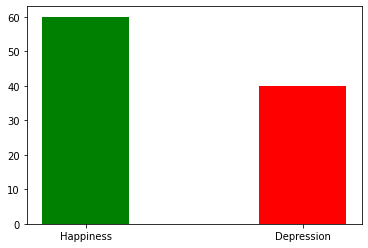

In [ ]:
plt.bar(["Happiness", "Depression"], [hpper, 100-hpper], width=0.4, align="center", color=["green", "red"])